In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import tensorflow as tf
from tensorflow import keras
import cv2
import PIL
from PIL import Image

from sklearn.model_selection import train_test_split
import os

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d omkargurav/face-mask-dataset
!unzip *.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [3]:
#Sets up data set training
with_mask_file=os.listdir('./data/with_mask')
without_mask_file=os.listdir('./data/without_mask')
with_mask_label=[1]*len(with_mask_file)
without_mask_label=[0]*len(without_mask_file)
labels=with_mask_label+without_mask_label

In [4]:
#Set up training split
with_mask_path = './data/with_mask/'
without_mask_path = './data/without_mask/'
data = []

for img_file in with_mask_file:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

for img_file in without_mask_file:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

X=np.array(data)
Y=np.array(labels)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=2)
x_train_scl=x_train/255
x_test_scl=x_test/255

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
model1=keras.Sequential()
model1.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model1.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model1.add(keras.layers.Flatten())

model1.add(keras.layers.Dense(128,activation='relu'))
model1.add(keras.layers.Dropout(0.50))

model1.add(keras.layers.Dense(64,activation='relu'))
model1.add(keras.layers.Dropout(0.50))

model1.add(keras.layers.Dense(2,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model2=keras.Sequential()
model2.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='elu',input_shape=(128,128,3)))
model2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model2.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='elu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model2.add(keras.layers.Flatten())

model2.add(keras.layers.Dense(128,activation='elu'))
model2.add(keras.layers.Dropout(0.50))

model2.add(keras.layers.Dense(64,activation='elu'))
model2.add(keras.layers.Dropout(0.50))

model2.add(keras.layers.Dense(2,activation='sigmoid'))

In [7]:
model3=keras.Sequential()
model3.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='leaky_relu',input_shape=(128,128,3)))
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model3.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='leaky_relu'))
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model3.add(keras.layers.Flatten())

model3.add(keras.layers.Dense(128,activation='leaky_relu'))
model3.add(keras.layers.Dropout(0.50))

model3.add(keras.layers.Dense(64,activation='leaky_relu'))
model3.add(keras.layers.Dropout(0.50))

model3.add(keras.layers.Dense(2,activation='sigmoid'))

In [8]:
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model1= model1.fit(x_train_scl,y_train,validation_split=0.1,epochs=10)



loss,acc=model1.evaluate(x_test_scl,y_test)
print('The Accuracy = ',int(acc*100),'%')

h1 = Model1

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 159s 805ms/step - accuracy: 0.6673 - loss: 0.7397 - val_accuracy: 0.8632 - val_loss: 0.3400
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 193s 761ms/step - accuracy: 0.8775 - loss: 0.3194 - val_accuracy: 0.8485 - val_loss: 0.3468
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 201s 755ms/step - accuracy: 0.8884 - loss: 0.2983 - val_accuracy: 0.8824 - val_loss: 0.2639
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 146s 761ms/step - accuracy: 0.9063 - loss: 0.2331 - val_accuracy: 0.8897 - val_loss: 0.2486
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 202s 760ms/step - accuracy: 0.9246 - loss: 0.1959 - val_accuracy: 0.8853 - val_loss: 0.2778
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 198s 742ms/step - accuracy: 0.9066 - loss: 0.2411 - val_accuracy: 0.9074 - val_loss: 0.2456
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 144s 748ms/step - accuracy: 0.9301 - loss: 0.1822 - val_accuracy: 0.8985 - val_loss: 0.2947
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 146s 761ms/step - accuracy: 0.9397 -

In [9]:
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model2= model2.fit(x_train_scl,y_train,validation_split=0.1,epochs=10)



loss,acc=model2.evaluate(x_test_scl,y_test)
print('The Accuracy = ',int(acc*100),'%')

h2 = Model2

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 159s 815ms/step - accuracy: 0.7337 - loss: 1.1903 - val_accuracy: 0.8779 - val_loss: 0.2867
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 202s 821ms/step - accuracy: 0.8540 - loss: 0.3909 - val_accuracy: 0.8912 - val_loss: 0.2693
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 202s 820ms/step - accuracy: 0.8858 - loss: 0.3043 - val_accuracy: 0.9074 - val_loss: 0.2546
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 159s 828ms/step - accuracy: 0.8932 - loss: 0.2661 - val_accuracy: 0.9015 - val_loss: 0.2823
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 202s 827ms/step - accuracy: 0.9135 - loss: 0.2302 - val_accuracy: 0.9044 - val_loss: 0.2588
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 202s 830ms/step - accuracy: 0.9274 - loss: 0.2003 - val_accuracy: 0.9059 - val_loss: 0.2767
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 201s 827ms/step - accuracy: 0.9374 - loss: 0.1601 - val_accuracy: 0.9088 - val_loss: 0.2350
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 203s 829ms/step - accuracy: 0.9441 -

In [12]:
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model3= model3.fit(x_train_scl,y_train,validation_split=0.1,epochs=10)



loss,acc=model3.evaluate(x_test_scl,y_test)
print('The Accuracy = ',int(acc*100),'%')

h3 = Model3

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 156s 799ms/step - accuracy: 0.9732 - loss: 0.0682 - val_accuracy: 0.9074 - val_loss: 0.4024
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 201s 795ms/step - accuracy: 0.9796 - loss: 0.0716 - val_accuracy: 0.9132 - val_loss: 0.4128
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 200s 787ms/step - accuracy: 0.9869 - loss: 0.0459 - val_accuracy: 0.9074 - val_loss: 0.2843
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 200s 774ms/step - accuracy: 0.9802 - loss: 0.0686 - val_accuracy: 0.9250 - val_loss: 0.3521
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 202s 773ms/step - accuracy: 0.9871 - loss: 0.0398 - val_accuracy: 0.9044 - val_loss: 0.4117
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 201s 770ms/step - accuracy: 0.9898 - loss: 0.0414 - val_accuracy: 0.9176 - val_loss: 0.3622
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 203s 773ms/step - accuracy: 0.9867 - loss: 0.0462 - val_accuracy: 0.9265 - val_loss: 0.3944
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 200s 768ms/step - accuracy: 0.9882 -

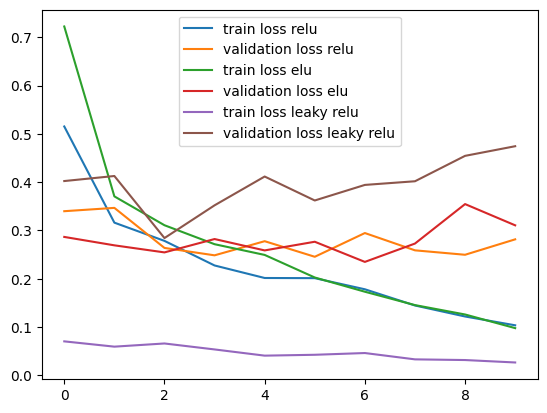

In [14]:
plt.plot(h1.history['loss'], label='train loss relu')
plt.plot(h1.history['val_loss'], label='validation loss relu')
plt.plot(h2.history['loss'], label='train loss elu')
plt.plot(h2.history['val_loss'], label='validation loss elu')
plt.plot(h3.history['loss'], label='train loss leaky relu')
plt.plot(h3.history['val_loss'], label='validation loss leaky relu')
plt.legend()
plt.show()

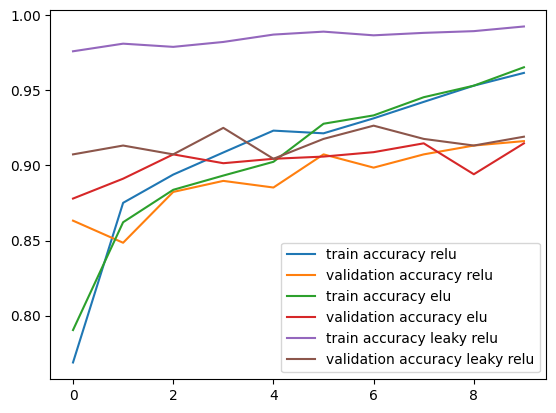

In [15]:
plt.plot(h1.history['accuracy'], label='train accuracy relu')
plt.plot(h1.history['val_accuracy'], label='validation accuracy relu')
plt.plot(h2.history['accuracy'], label='train accuracy elu')
plt.plot(h2.history['val_accuracy'], label='validation accuracy elu')
plt.plot(h3.history['accuracy'], label='train accuracy leaky relu')
plt.plot(h3.history['val_accuracy'], label='validation accuracy leaky relu')
plt.legend()
plt.show()